In [ ]:
# === Importing Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# NLTK for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# === Step 1: Load the Dataset ===
# Define column names explicitly since no header in CSV
columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Load dataset from CSV
df = pd.read_csv('/content/review.csv', encoding='latin1', on_bad_lines='skip', names=columns)

# Retain only the relevant columns
df = df[['text', 'target']]

# Show unique classes before binarization
print("Original target values:", df['target'].unique())

# Convert target to binary: 0 = negative, 1 = positive
df['target'] = df['target'].replace(4, 1)

# Display class distribution after replacement
print("\nClass distribution:")
print(df['target'].value_counts())

# === Step 2: Preprocessing and Cleaning ===
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to clean and preprocess text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize text
    # Remove stopwords and apply stemming
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

# Apply the cleaning function to all text data
df['cleaned_text'] = df['text'].apply(clean_text)

# Optional: Remove rows with empty cleaned text
df = df[df['cleaned_text'].str.strip() != '']

# === Step 3: Vectorization ===
# Convert text to numerical format using Bag-of-Words
vectorizer = CountVectorizer(max_features=5000)
x = vectorizer.fit_transform(df['cleaned_text'])  # keep it sparse!

# Target variable
y = df['target']

# Check number of classes to prevent training error
print("\nFinal class labels:", np.unique(y))
if len(np.unique(y)) < 2:
    raise ValueError("Target contains only one class. Cannot train model.")

# === Step 4: Train-Test Split ===
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y  # stratify to preserve class distribution
)

# === Step 5: Model Training ===
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# === Step 6: Model Evaluation ===
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original target values: [0 4]

Class distribution:
target
0    800000
1    800000
Name: count, dtype: int64

Final class labels: [0 1]

Accuracy: 0.7677213231087616
Confusion Matrix:
 [[117809  42133]
 [ 32169 127772]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76    159942
           1       0.75      0.80      0.77    159941

    accuracy                           0.77    319883
   macro avg       0.77      0.77      0.77    319883
weighted avg       0.77      0.77      0.77    319883



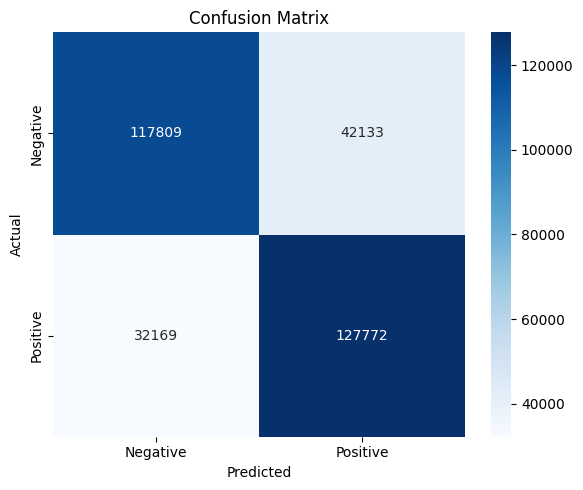

In [ ]:
# === Visualize Confusion Matrix ===
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
